In [2]:
# Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['figure.facecolor'] = 'white'

pd.set_option('display.max_rows', None)

matplotlib.rcParams.update({'font.size': 15})

In [3]:
TIME_RETRIEVAL_REE = 0
TIME_RETRIEVAL_TEE = 10
TIME_RETRIEVAL_REE_WASM = 0
TIME_RETRIEVAL_TEE_WASM = 13

In [4]:
def compute_mean_std(size, time, factor = 1):
    df = pd.DataFrame(columns = ["Size","Time"])
    df["Size"] = size
    df["Time"] = time * factor
    
    result = pd.DataFrame(columns = ["Size","Mean","Std"])
    result["Mean"] = df.groupby("Size")["Time"].median() #df.groupby("Size")["Time"].apply(stats.gmean)
    result["Std"] = df.groupby("Size")["Time"].std() #df.groupby("Size")["Time"].apply(stats.gstd)
    result["Size"] = df.groupby("Size").groups.keys()
    
    return result

def formatForLatex(n):
    roundedAsString = str(round(n, 0))
    if "." in roundedAsString:
        roundedAsString = roundedAsString.rstrip("0")
        roundedAsString = roundedAsString.rstrip(".")
    return f"{roundedAsString}"

In [5]:
# Import the dataset
columns = ["Size","LaunchStart","MemoryStart","MemoryEnd","HashStart","HashEnd","InitEnd","LoadEnd","InstantiateEnd","LaunchEnd"]
launchtime_raw = pd.read_csv("../logs/launch-time/general.csv", names = columns)

display(launchtime_raw)

,Size,LaunchStart,MemoryStart,MemoryEnd,HashStart,HashEnd,InitEnd,LoadEnd,InstantiateEnd,LaunchEnd
0,1,1744810009375498,1744810009375655,1744810009376285,1744810009376296,1744810009376304,1744810009382483,1744810009388932,1744810009389262,1744810009389586
1,1,1744810011808388,1744810011808592,1744810011809250,1744810011809260,1744810011809267,1744810011815445,1744810011822108,1744810011822442,1744810011822767
2,1,1744810014404506,1744810014404689,1744810014405365,1744810014405375,1744810014405382,1744810014411782,1744810014418502,1744810014418840,1744810014419172
3,1,1744810017206632,1744810017206808,1744810017207461,1744810017207469,1744810017207475,1744810017213670,1744810017220387,1744810017220751,1744810017221084
4,1,1744810019871640,1744810019871856,1744810019872514,1744810019872526,1744810019872533,1744810019878693,1744810019885501,1744810019885846,1744810019886182
5,1,1744810022463456,1744810022463956,1744810022464779,1744810022464790,1744810022464798,1744810022472368,1744810022481000,1744810022481412,1744810022482203
6,1,1744810025023716,1744810025023897,1744810025024592,1744810025024602,1744810025024607,1744810025031001,1744810025037543,1744810025037874,1744810025038198
7,1,1744810027555035,1744810027555249,1744810027555903,1744810027555914,1744810027555921,1744810027562125,1744810027568794,1744810027569132,1744810027569464
8,1,1744810030125384,1744810030125614,1744810030126387,1744810030126400,1744810030126410,1744810030132767,1744810030139462,1744810030139800,1744810030140131
9,1,1744810032622002,1744810032622185,1744810032622813,1744810032622825,1744810032622834,1744810032628995,1744810032635473,1744810032635806,1744810032636130


In [6]:
# Summary of the gathered timespans
launchtime = pd.DataFrame()
launchtime["Size"] = launchtime_raw["Size"]

launchtime["LaunchSpan"] = launchtime_raw["LaunchEnd"] - launchtime_raw["LaunchStart"] \
                        - TIME_RETRIEVAL_REE/2 - 7*TIME_RETRIEVAL_TEE - TIME_RETRIEVAL_TEE_WASM/2

launchtime["TransitionSpan"] = launchtime_raw["MemoryStart"] - launchtime_raw["LaunchStart"] \
                        - TIME_RETRIEVAL_REE/2 - TIME_RETRIEVAL_TEE/2

launchtime["MemorySpan"] = launchtime_raw["MemoryEnd"] - launchtime_raw["MemoryStart"] \
                        - 2*TIME_RETRIEVAL_TEE/2

launchtime["HashSpan"] = launchtime_raw["HashEnd"] - launchtime_raw["HashStart"] \
                        - 2*TIME_RETRIEVAL_TEE/2

launchtime["WasmInitSpan"] = launchtime_raw["InitEnd"] - launchtime_raw["HashEnd"] \
                        - 2*TIME_RETRIEVAL_TEE/2

launchtime["WasmLoadSpan"] = launchtime_raw["LoadEnd"] - launchtime_raw["InitEnd"] \
                        - 2*TIME_RETRIEVAL_TEE/2

launchtime["WasmInstantiateSpan"] = launchtime_raw["InstantiateEnd"] - launchtime_raw["LoadEnd"] \
                        - 2*TIME_RETRIEVAL_TEE/2

launchtime["WasmExecutionSpan"] = launchtime_raw["LaunchEnd"] - launchtime_raw["InstantiateEnd"] \
                        - TIME_RETRIEVAL_TEE/2 - TIME_RETRIEVAL_TEE_WASM/2

launchtime["OtherSpan"] = launchtime["LaunchSpan"] - launchtime["TransitionSpan"] - launchtime["MemorySpan"] \
                        - launchtime["HashSpan"] - launchtime["WasmInitSpan"] - launchtime["WasmLoadSpan"] \
                        - launchtime["WasmInstantiateSpan"] - launchtime["WasmExecutionSpan"]

launchtime

,Size,LaunchSpan,TransitionSpan,MemorySpan,HashSpan,WasmInitSpan,WasmLoadSpan,WasmInstantiateSpan,WasmExecutionSpan,OtherSpan
0,1,14011.5,152.0,620.0,-2.0,6169.0,6439.0,320.0,312.5,1.0
1,1,14302.5,199.0,648.0,-3.0,6168.0,6653.0,324.0,313.5,0.0
2,1,14589.5,178.0,666.0,-3.0,6390.0,6710.0,328.0,320.5,0.0
3,1,14375.5,171.0,643.0,-4.0,6185.0,6707.0,354.0,321.5,-2.0
4,1,14465.5,211.0,648.0,-3.0,6150.0,6798.0,335.0,324.5,2.0
5,1,18670.5,495.0,813.0,-2.0,7560.0,8622.0,402.0,779.5,1.0
6,1,14405.5,176.0,685.0,-5.0,6384.0,6532.0,321.0,312.5,0.0
7,1,14352.5,209.0,644.0,-3.0,6194.0,6659.0,328.0,320.5,1.0
8,1,14670.5,225.0,763.0,0.0,6347.0,6685.0,328.0,319.5,3.0
9,1,14051.5,178.0,618.0,-1.0,6151.0,6468.0,323.0,312.5,2.0


In [7]:
# Compute the mean and std
launch_span = compute_mean_std(launchtime_raw["Size"], launchtime["LaunchSpan"], factor=0.001)
launch_span

,Size,Mean,Std
Size,,,
1,1,14.4590,1.563321
2,2,22.7420,2.609226
3,3,30.8190,3.730009
4,4,38.9680,3.105747
5,5,47.0670,2.302719
6,6,55.3845,3.771957
7,7,63.3630,4.823984
8,8,71.2840,3.570458
9,9,79.2010,8.523656


In [8]:
transition_span = compute_mean_std(launchtime_raw["Size"], launchtime["TransitionSpan"], factor=0.001)
transition_span

,Size,Mean,Std
Size,,,
1,1,0.1945,0.047844
2,2,0.2650,0.047607
3,3,0.3240,0.076231
4,4,0.3735,0.087055
5,5,0.4275,0.120673
6,6,0.4465,0.103031
7,7,0.4755,0.115749
8,8,0.4820,0.079086
9,9,0.5385,0.101618


In [9]:
memory_span = compute_mean_std(launchtime_raw["Size"], launchtime["MemorySpan"], factor=0.001)
memory_span

,Size,Mean,Std
Size,,,
1,1,0.6480,0.085031
2,2,1.2605,0.158753
3,3,1.8605,0.253886
4,4,2.4660,0.343926
5,5,3.0755,0.454399
6,6,3.7000,0.505916
7,7,4.3205,0.488482
8,8,4.9530,0.471511
9,9,5.5800,0.565451


In [10]:
hash_span = compute_mean_std(launchtime_raw["Size"], launchtime["HashSpan"], factor=0.001)
hash_span

,Size,Mean,Std
Size,,,
1,1,-0.004,0.001312
2,2,-0.004,0.002311
3,3,-0.004,0.003180
4,4,-0.004,0.005899
5,5,-0.004,0.001013
6,6,-0.004,0.001431
7,7,-0.004,0.000950
8,8,-0.004,0.000953
9,9,-0.004,0.001882


In [11]:
wasm_init_span = compute_mean_std(launchtime_raw["Size"], launchtime["WasmInitSpan"], factor=0.001)
wasm_init_span

,Size,Mean,Std
Size,,,
1,1,6.2040,0.892034
2,2,7.5315,1.054832
3,3,8.8595,1.078916
4,4,10.2065,1.136465
5,5,11.4655,0.880826
6,6,12.7595,1.437446
7,7,14.0295,1.100185
8,8,15.2735,1.172293
9,9,16.0060,1.424452


In [12]:
wasm_load_span = compute_mean_std(launchtime_raw["Size"], launchtime["WasmLoadSpan"], factor=0.001)
wasm_load_span

,Size,Mean,Std
Size,,,
1,1,6.7130,0.629666
2,2,12.9275,1.999588
3,3,19.0910,2.328028
4,4,25.2640,1.706460
5,5,31.4370,1.377998
6,6,37.7470,2.077348
7,7,43.8670,3.790170
8,8,50.0325,2.229629
9,9,56.1845,7.797673


In [13]:
wasm_instantiate_span = compute_mean_std(launchtime_raw["Size"], launchtime["WasmInstantiateSpan"], factor=0.001)
wasm_instantiate_span

,Size,Mean,Std
Size,,,
1,1,0.328,0.108604
2,2,0.324,0.065752
3,3,0.326,0.193613
4,4,0.327,0.076260
5,5,0.327,0.088182
6,6,0.329,0.098193
7,7,0.328,0.065326
8,8,0.328,0.096909
9,9,0.328,0.104971


In [14]:
wasm_execution_span = compute_mean_std(launchtime_raw["Size"], launchtime["WasmExecutionSpan"], factor=0.001)
wasm_execution_span

,Size,Mean,Std
Size,,,
1,1,0.3205,0.088623
2,2,0.3175,0.069462
3,3,0.3145,0.081424
4,4,0.3145,0.066243
5,5,0.3145,0.034020
6,6,0.3155,0.081346
7,7,0.3155,0.045689
8,8,0.3155,0.090080
9,9,0.3155,0.073446


In [15]:
other_span = compute_mean_std(launchtime_raw["Size"], launchtime["OtherSpan"], factor=0.001)
other_span

,Size,Mean,Std
Size,,,
1,1,0.001,0.001795
2,2,0.003,0.003942
3,3,0.007,0.004745
4,4,0.009,0.005516
5,5,0.008,0.005179
6,6,0.009,0.043499
7,7,0.009,0.003366
8,8,0.009,0.003765
9,9,0.010,0.006457


Text(0, 0.5, 'Time in microseconds')

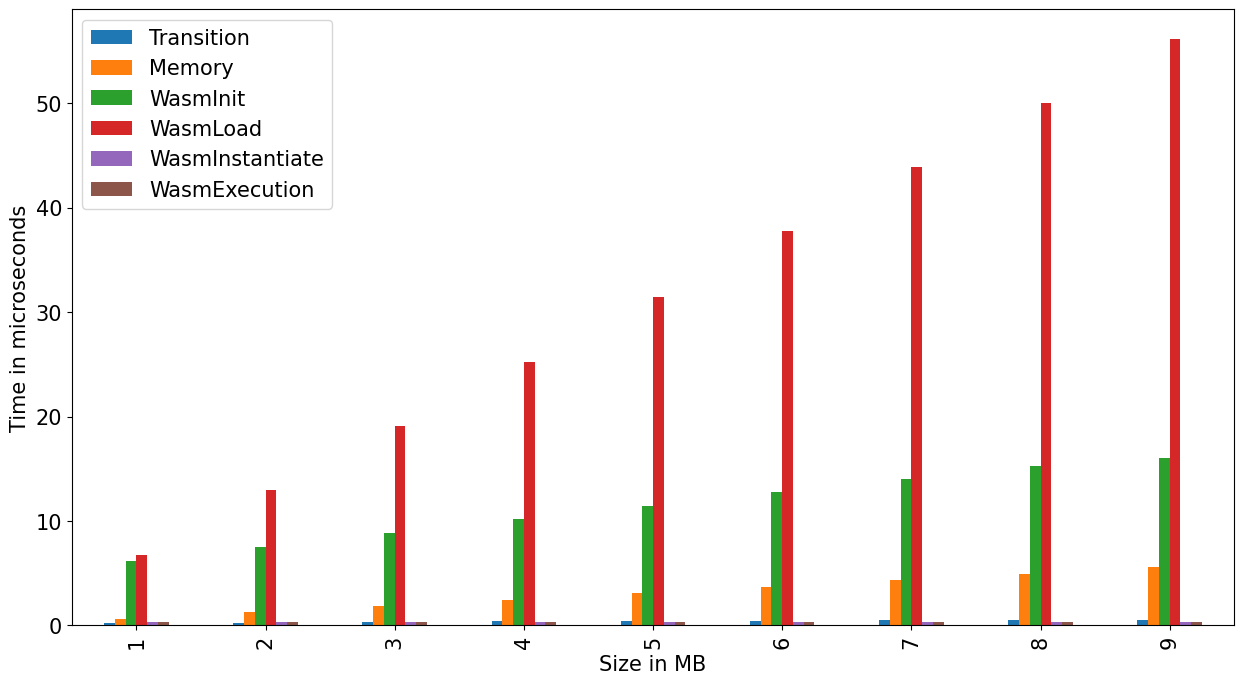

In [21]:
# Draw the area plot
area_plot_data = pd.DataFrame()
area_plot_data["Transition"] = transition_span["Mean"]
area_plot_data["Memory"] = memory_span["Mean"]
# area_plot_data["Hash"] = hash_span["Mean"]
area_plot_data["WasmInit"] = wasm_init_span["Mean"]
area_plot_data["WasmLoad"] = wasm_load_span["Mean"]
area_plot_data["WasmInstantiate"] = wasm_instantiate_span["Mean"]
area_plot_data["WasmExecution"] = wasm_execution_span["Mean"]

ax = area_plot_data.plot.bar() # .area()
ax.set_xlabel("Size in MB")
ax.set_ylabel("Time in microseconds")

In [17]:
#
# Show the ratio of the elements
#

ratio = pd.DataFrame()
ratio["Transition"] = transition_span["Mean"] / launch_span["Mean"]
ratio["Memory"] = memory_span["Mean"] / launch_span["Mean"]
ratio["Hash"] = hash_span["Mean"] / launch_span["Mean"]
ratio["WasmInit"] = wasm_init_span["Mean"] / launch_span["Mean"]
ratio["WasmLoad"] = wasm_load_span["Mean"] / launch_span["Mean"]
ratio["WasmInstantiate"] = wasm_instantiate_span["Mean"] / launch_span["Mean"]
ratio["WasmExecution"] = wasm_execution_span["Mean"] / launch_span["Mean"]

ratio

,Transition,Memory,Hash,WasmInit,WasmLoad,WasmInstantiate,WasmExecution
Size,,,,,,,
1,0.013452,0.044816,-0.000277,0.429075,0.464278,0.022685,0.022166
2,0.011652,0.055426,-0.000176,0.331171,0.568442,0.014247,0.013961
3,0.010513,0.060369,-0.000130,0.287469,0.619456,0.010578,0.010205
4,0.009585,0.063283,-0.000103,0.261920,0.648327,0.008392,0.008071
5,0.009083,0.065343,-0.000085,0.243600,0.667920,0.006948,0.006682
6,0.008062,0.066806,-0.000072,0.230380,0.681544,0.005940,0.005697
7,0.007504,0.068186,-0.000063,0.221415,0.692313,0.005177,0.004979
8,0.006762,0.069483,-0.000056,0.214263,0.701876,0.004601,0.004426
9,0.006799,0.070454,-0.000051,0.202093,0.709391,0.004141,0.003984


In [18]:
ratio.mean() * 100

Transition          0.926799
Memory              6.268503
Hash               -0.011244
WasmInit           26.904291
WasmLoad           63.928294
WasmInstantiate     0.918978
WasmExecution       0.890775
dtype: float64

In [19]:
# Export CSV
#
# File format: experiment_name, mean, stddev

transition_span.drop(columns="Size").to_csv('../logs/launch-time/transition_formatted.csv')
memory_span.drop(columns="Size").to_csv('../logs/launch-time/memory_formatted.csv')
hash_span.drop(columns="Size").to_csv('../logs/launch-time/hash_formatted.csv')
wasm_init_span.drop(columns="Size").to_csv('../logs/launch-time/wasm_init_formatted.csv')
wasm_load_span.drop(columns="Size").to_csv('../logs/launch-time/wasm_load_formatted.csv')
wasm_instantiate_span.drop(columns="Size").to_csv('../logs/launch-time/wasm_instantiate_formatted.csv')
wasm_execution_span.drop(columns="Size").to_csv('../logs/launch-time/wasm_execution_formatted.csv')

In [20]:
# Export LaTeX

ratio_median = ratio.median()
prefix = "LaunchTime"

def write_ratio(file, column_name, ratio):
    f.write(f"\\def\\bm{prefix}{column_name}Ratio{{{formatForLatex(ratio * 100)}}}\n")

f = open('../logs/launch-time/export.tex', "w")
write_ratio(f, "WasmInit", ratio_median["WasmInit"])
write_ratio(f, "WasmLoad", ratio_median["WasmLoad"])
write_ratio(f, "Memory", ratio_median["Memory"])
write_ratio(f, "Hash", ratio_median["Hash"])
f.close()